In [18]:
#импортируем нужные модули и считываем исходный датафрейм
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_init = pd.read_csv("titanic.csv")
df_init

,PassengerId,Survived,Pclass,Name Passenger,Gender Passenger,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
#выводим статистику по структуре данных
df = df_init.copy()
print(f"Датафрейм имеет {len(df.columns)} столбцов и {len(df)} строку")
print()
bsize = df.memory_usage(index=True).sum()
print(f"Датафрейм занимает {bsize} байт после прочтения")
print()
print(f"Столбцы имеют следующие типы данных")
print( df.dtypes.groupby(df.dtypes).count() )

Датафрейм имеет 12 столбцов и 891 строку

Датафрейм занимает 85664 байт после прочтения

Столбцы имеют следующие типы данных
int64      5
float64    2
object     5
dtype: int64


In [32]:
#cформируем кортеж из названий столбцов в нужном формате
df.columns = [ str(s).replace(" ", "_").lower() for s in df.columns ]
df

,passengerid,survived,pclass,name_passenger,gender_passenger,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [21]:
# определяем количество пустых ячеек в каждом столбце
print(df.isna().sum())

# заполняем пустые ячейки средними значениями по столбцу
df = df.fillna(df.mean())
most_common_embarked= df['embarked'].mode()[0]
most_common_embarked= df['embarked'].fillna(most_common_embarked,inplace=True)
df['cabin'].fillna('unknown',inplace=True)




passengerid           0
survived              0
pclass                0
name_passenger        0
gender_passenger      0
age                 177
sibsp                 0
parch                 0
ticket                0
fare                  0
cabin               687
embarked              2
dtype: int64


In [22]:

# проверяем, что все ячейки заполнены
print()
print(df.isna().sum())


passengerid         0
survived            0
pclass              0
name_passenger      0
gender_passenger    0
age                 0
sibsp               0
parch               0
ticket              0
fare                0
cabin               0
embarked            0
dtype: int64


In [23]:
print("Для разбиения на типы переменных приведем статистику по количеству уникальных значений")
print(df.nunique ())
print()
N_category = 20 #выбрали по выведенной таблице границу категориальных признаков

cat_list = []
interv_list = []
cat_df_res = pd.DataFrame()
interv_df_res = pd.DataFrame()
print(df.dtypes)
for c in df.columns:
    if df[c].nunique ()<N_category: 
        cat_list.append(c)
        cat_df_res.loc[c, ["Количество уникальных", "Мода", "Количество пропущенных"]] = [df[c].nunique(), 
                                                               list(df[c].mode ())[0], 
                                                               df[c].isnull().sum ()]
    elif (df[c].dtypes!=object)  & ( float( df[c].nunique () )>N_category ): 
        interv_list.append(c)
        interv_df_res.loc[c, ["Медиана", "Среднее", "Максимум", "Минимум"]] = [df[c].median(),
                                                                                df[c].mean(),
                                                                                df[c].max(),
                                                                                df[c].min()]
print("Показатели по категориальным признакам")
print(cat_df_res.T)
print()
print("Показатели по интервальным признакам")
print(interv_df_res.T.round(1))

Для разбиения на типы переменных приведем статистику по количеству уникальных значений
passengerid         891
survived              2
pclass                3
name_passenger      891
gender_passenger      2
age                  89
sibsp                 7
parch                 7
ticket              681
fare                248
cabin               148
embarked              3
dtype: int64

passengerid           int64
survived              int64
pclass                int64
name_passenger       object
gender_passenger     object
age                 float64
sibsp                 int64
parch                 int64
ticket               object
fare                float64
cabin                object
embarked             object
dtype: object
Показатели по категориальным признакам
                       survived pclass gender_passenger sibsp parch embarked
Количество уникальных         2      3                2     7     7        3
Мода                          0      3             male     0     0 

In [24]:
print(f"Доля выживших пассажиров {round(df.loc[(df.survived==1)|(df.survived==0),'survived'].astype(int).mean(),3)}")

Доля выживших пассажиров 0.384


In [25]:
group_ind_dict = {"Класс каюты":'pclass',"Пол пассажира":'gender_passenger',"Порт посадки":'embarked',"Пол пассажира и класс каюты":['gender_passenger','pclass']}
for gid in group_ind_dict.keys():
    print(f"Доля выживших пассажиров в зависимости от переменной '{gid}''")
    gi = group_ind_dict[gid]
    df1 = df.astype({'survived':int}).groupby(gi)['survived'].mean()
    print(df1.round(3))
    print()

Доля выживших пассажиров в зависимости от переменной 'Класс каюты''
pclass
1    0.630
2    0.473
3    0.242
Name: survived, dtype: float64

Доля выживших пассажиров в зависимости от переменной 'Пол пассажира''
gender_passenger
female    0.742
male      0.189
Name: survived, dtype: float64

Доля выживших пассажиров в зависимости от переменной 'Порт посадки''
embarked
C    0.554
Q    0.390
S    0.339
Name: survived, dtype: float64

Доля выживших пассажиров в зависимости от переменной 'Пол пассажира и класс каюты''
gender_passenger  pclass
female            1         0.968
                  2         0.921
                  3         0.500
male              1         0.369
                  2         0.157
                  3         0.135
Name: survived, dtype: float64



embarked                 C         Q         S
gender_passenger                              
female            0.876712  0.750000  0.692683
male              0.305263  0.073171  0.174603
embarked                 C    Q        S
gender_passenger                        
female            0.976744  1.0  0.96000
male              0.404762  0.0  0.35443
embarked            C    Q         S
gender_passenger                    
female            1.0  1.0  0.910448
male              0.2  0.0  0.154639
embarked                 C         Q         S
gender_passenger                              
female            0.652174  0.727273  0.375000
male              0.232558  0.076923  0.128302


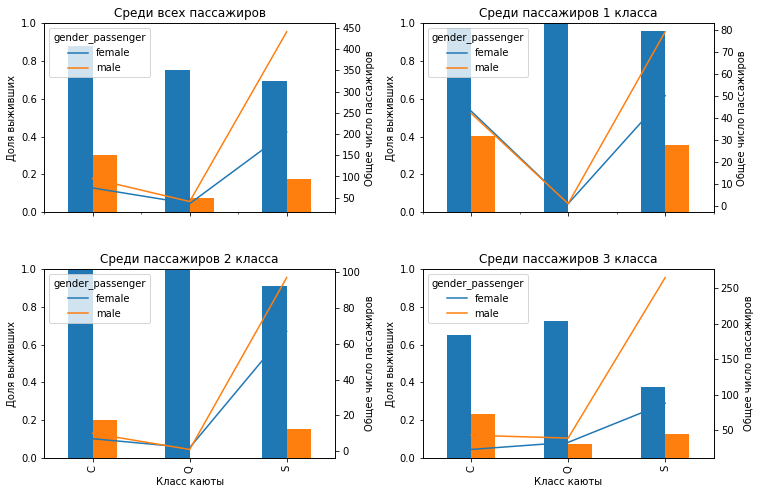

In [26]:
fig, axes = plt.subplots(figsize=(12,8),nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)

def group_port_e(port):
    df_m = df[df.pclass.isin(port)].astype({'survived':int}).groupby(['gender_passenger','embarked'])['survived'].mean()
    df_c = df[df.pclass.isin(port)].astype({'survived':int}).groupby(['gender_passenger','embarked'])['survived'].count()
    df3 = df_m.unstack()
    df4 = df_c.unstack()
    return df3, df4

si = 1
ports = [[1,2,3], [1], [2], [3]]
ports_label = ["Среди всех пассажиров", "Среди пассажиров 1 класса", "Среди пассажиров 2 класса", "Среди пассажиров 3 класса"]
for p in ports:
    df3 = group_port_e(p)[0]
    df4 = group_port_e(p)[1]
    ax1=plt.subplot(2,2,si)
    df3.T.plot(ax=ax1, kind='bar') #,stacked=True
    print(df3)
    ax2 = ax1.twinx()
    df4.T.plot(ax=ax2, kind='line')
    ax1.set_ylim(0, 1)
    ax1.get_legend().remove()
    ax1.set_ylabel("Доля выживших")
    ax2.set_ylabel("Общее число пассажиров")
    ax1.set_xlabel("Класс каюты")
    plt.title(ports_label[si-1])
    si+=1

In [27]:
#Для определения влияния каждого признака на выживание 
corr_matrix=df.corr()
print (corr_matrix['survived'].sort_values(ascending=False))


survived       1.000000
fare           0.257307
parch          0.081629
passengerid   -0.005007
sibsp         -0.035322
age           -0.069809
pclass        -0.338481
Name: survived, dtype: float64


Для разбиения на типы переменных приведем статистику по количеству уникальных значений
passengerid         891
survived              2
pclass                3
name_passenger      891
gender_passenger      2
age                  89
sibsp                 7
parch                 7
ticket              681
fare                248
cabin               148
embarked              3
dtype: int64


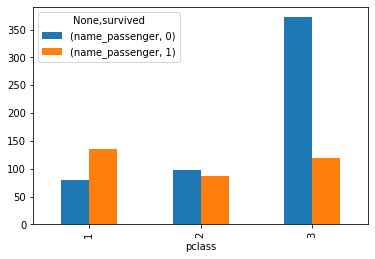

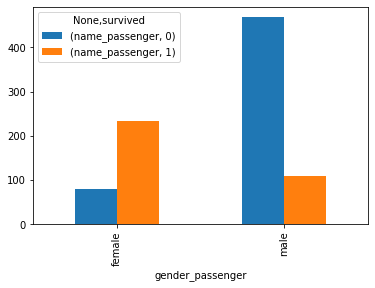

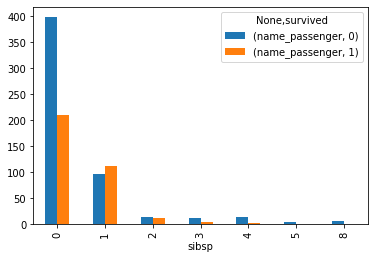

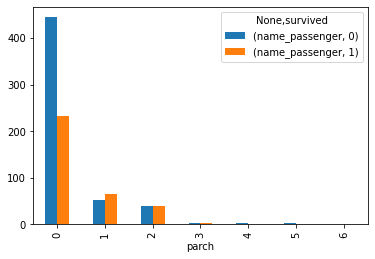

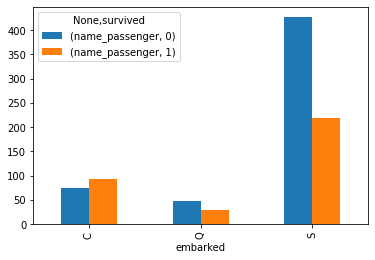

In [28]:
print("Для разбиения на типы переменных приведем статистику по количеству уникальных значений")
print(df.nunique ())
N_category = 20 #выбрали по выведенной таблице границу категориальных признаков

cat_list = []
interv_list = []
cat_df_res = pd.DataFrame()
interv_df_res = pd.DataFrame()
for c in df.columns:
    if c=='survived': continue
    if df[c].nunique ()<N_category: 
        df_c = df[[c, 'survived','name_passenger']].groupby([c, 'survived']).count().unstack()
        df_c.plot(kind='bar') #,stacked=True



Доля выживших пассажиров в зависимости от переменной 'Пол пассажира и класс каюты''
pclass                1      2      3
gender_passenger                     
female            0.968  0.921  0.500
male              0.369  0.157  0.135



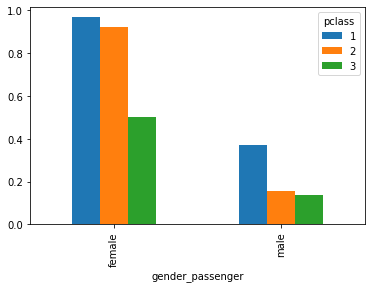

In [29]:
group_ind_dict = {"Пол пассажира и класс каюты":['gender_passenger','pclass']}
for gid in group_ind_dict.keys():
    print(f"Доля выживших пассажиров в зависимости от переменной '{gid}''")
    gi = group_ind_dict[gid]
    df1 = df.astype({'survived':int}).groupby(gi)['survived'].mean().unstack()
    df1.plot(kind='bar') #,stacked=True
    print(df1.round(3))
    print()

Доля выживших пассажиров в зависимости от переменной 'Пол пассажира и класс каюты''
parch      0      1      2      3    4      5    6
sibsp                                             
0      0.304  0.658  0.724  1.000  0.0  0.000  NaN
1      0.520  0.596  0.632  0.333  0.0  0.333  0.0
2      0.250  0.857  0.500  1.000  NaN    NaN  NaN
3      1.000  0.000  0.286    NaN  NaN    NaN  NaN
4        NaN  0.000  0.333    NaN  NaN    NaN  NaN
5        NaN    NaN  0.000    NaN  NaN    NaN  NaN
8        NaN    NaN  0.000    NaN  NaN    NaN  NaN



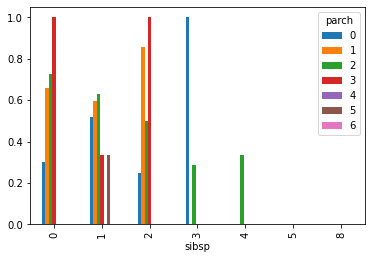

In [14]:
group_ind_dict = {"Пол пассажира и класс каюты":['sibsp','parch']}
for gid in group_ind_dict.keys():
    print(f"Доля выживших пассажиров в зависимости от переменной '{gid}''")
    gi = group_ind_dict[gid]
    df1 = df.astype({'survived':int}).groupby(gi)['survived'].mean().unstack()
    df1.plot(kind='bar') #,stacked=True
    print(df1.round(3))
    print()

survived      0    1
age_groups          
(0, 10]      26   38
(10, 20]     71   44
(20, 30]    271  136
(30, 40]     86   69
(40, 50]     53   33
(50, 60]     25   17
(60, 70]     13    4
(70, 80]      4    1


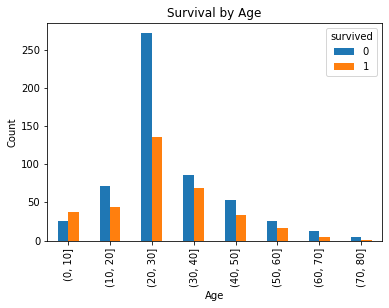

passengerid            int64
survived               int64
pclass                 int64
name_passenger        object
gender_passenger      object
age                  float64
sibsp                  int64
parch                  int64
ticket                object
fare                 float64
cabin                 object
embarked              object
age_groups          category
dtype: object
gender_passenger    female      male
age_groups                          
(0, 10]           0.612903  0.575758
(10, 20]          0.739130  0.144928
(20, 30]          0.723881  0.142857
(30, 40]          0.836364  0.230000
(40, 50]          0.677419  0.218182
(50, 60]          0.928571  0.142857
(60, 70]          1.000000  0.071429
(70, 80]               NaN  0.200000


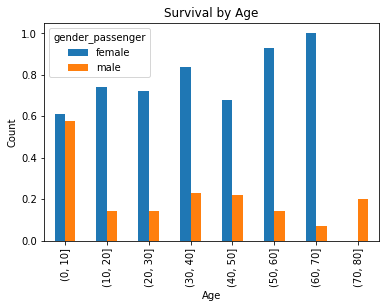

In [57]:
df['age_groups'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
age_survival = df.groupby(['age_groups', 'survived'])['survived'].count().unstack()
print(age_survival)
age_survival.plot(kind='bar', stacked=False)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

df['age_groups'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
print(df.dtypes)
age_survival = df.groupby(['age_groups','gender_passenger'])['survived'].mean().unstack()
print(age_survival)
age_survival.plot(kind='bar', stacked=False)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
